In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from typing import List, Optional

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [114]:
PRINTABLE_MODEL_NAMES = {
    "deepsets_mlp_sum": "DeepSets using MLPs and Sum Pooling",
    "mlp": "MLP",
    "sorted_mlp": "Sorting followed by MLP",
    "pna": "Principal Neighbourhood Aggregation",
    "small_set_transformer": "Set Transformer (Small)"
}

PRINTABLE_METRICS = {
    "mse": "Mean Squared Error",
    "mae": "Mean Absolute Error",
    "med_ae": "Median Absolute Error",
    "max_error": "Max Error",
    "mape": "Mean Absolute Percentage Error",
    "r2": "R$^2$ Score",
}

PRINTABLE_LABELS = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Sum of Pairs",
    "largest_triple_sum": "Max. Sum of Triples",
}

PRINTABLE_DATASETS = {
    "train": "Traing Set",
    "test": "Test Set",
}

CAP_SIZE = 5
LABEL_COLORS = {
    "sum": "r",
    "largest_pair_sum": "g",
    "largest_triple_sum": "b",
}
LABEL_FORMATS = {
    "sum": "-o",
    "largest_pair_sum": "-v",
    "largest_triple_sum": "-s",
}

def plot_metrics_results(results: pd.DataFrame, metric: str, title: str, ax: matplotlib.axes.Axes) -> None:
    set_sizes = results["max_set_size"].unique()
    for label in results["label"].unique():
        filtered_results = results[results["label"] == label]

        means = filtered_results.groupby(by="max_set_size").mean()["test_" + metric]
        stds = filtered_results.groupby(by="max_set_size").std()["test_" + metric]

        ax.errorbar(
            set_sizes,
            means,
            yerr=stds,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    ax.set_xlabel("Maximum Set Size")
    ax.set_ylabel(PRINTABLE_METRICS[metric])
    ax.legend()

def plot_metrics_results_overview(results: pd.DataFrame, model: str) -> None:
    metrics = ["mse", "mae", "med_ae", "max_error", "r2"] # N.B.: MAPE not included
    labels = results["label"].unique().tolist()

    filtered_results = results[["label", "max_set_size", "random_seed"] + ["test_" + metric for metric in metrics]]

    n_cols = len(metrics)
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(6 * n_cols, 6))
    fig.set_facecolor("white")
    fig.suptitle(PRINTABLE_MODEL_NAMES[model] + " - Metrics")
    plt.rcParams.update({'font.size': 14})

    for col, metric in enumerate(metrics):
        plot_metrics_results(
            filtered_results,
            metric=metric,
            title=PRINTABLE_METRICS[metric],
            ax=axes[col]
        )

    plt.tight_layout()
    plt.show()

def plot_label_stats(results: pd.DataFrame, dataset: str, ax: matplotlib.axes.Axes) -> None:
    set_sizes = results["max_set_size"].unique()

    for label in results["label"].unique():
        label_results = results[results["label"] == label]

        data = label_results[["max_set_size", f"{dataset}_label_mean"]]
        train_label_mean = data.groupby(by="max_set_size").mean()[f"{dataset}_label_mean"]

        data = label_results[["max_set_size", f"{dataset}_label_std"]]
        train_label_std = data.groupby(by="max_set_size").mean()[f"{dataset}_label_std"]

        ax.errorbar(
            set_sizes,
            train_label_mean,
            yerr=train_label_std,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    ax.set_xscale("log", base=2)
    ax.set_title(PRINTABLE_DATASETS[dataset] + " Label Mean")
    ax.set_xlabel("Maximum Set Size")
    ax.set_ylabel("Label Mean")
    ax.legend()

def plot_experiment_overview(results: pd.DataFrame, model: str) -> None:
    datasets = ["train", "test"]
    experiment_info = ["epochs"] + [dataset + "_label_mean" for dataset in datasets] + [dataset + "_label_std" for dataset in datasets]
    labels = results["label"].unique().tolist()

    filtered_results = results[["label", "max_set_size", "random_seed"] + experiment_info]

    n_cols = len(datasets) + 1 # +1 for epochs.
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(6 * n_cols, 6))
    fig.set_facecolor("white")
    fig.suptitle(PRINTABLE_MODEL_NAMES[model] + " - Experiment Statistics")
    plt.rcParams.update({'font.size': 14})

    for col, dataset in enumerate(datasets):
        plot_label_stats(results, dataset=dataset, ax=axes[col])

    set_sizes = results["max_set_size"].unique()
    for label in results["label"].unique():
        label_results = filtered_results[filtered_results["label"] == label]

        means = label_results.groupby(by="max_set_size").mean()["epochs"]
        stds = label_results.groupby(by="max_set_size").std()["epochs"]

        axes[-1].errorbar(
            set_sizes,
            means,
            yerr=stds,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    axes[-1].set_title("Final Training Epoch")
    axes[-1].set_xscale('log', base=2)
    axes[-1].set_xlabel("Maximum Set Size")
    axes[-1].set_ylabel("Epoch")
    axes[-1].legend()

    plt.tight_layout()
    plt.show()

def plot_model_results(model: str) -> None:
    results = pd.read_csv(os.path.join("set-size-sweep-results", f"{model}-diff-set-sizes-results.csv"))

    plot_metrics_results_overview(results, model=model)
    plot_experiment_overview(results, model=model)

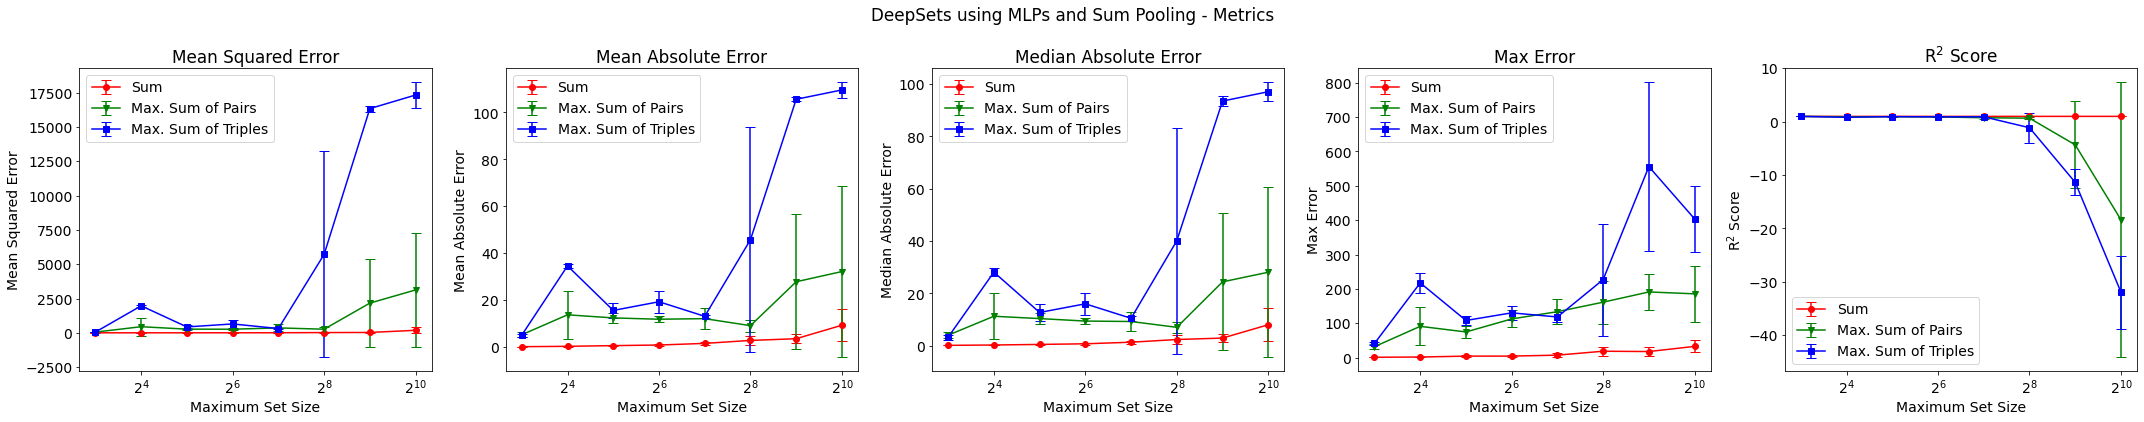

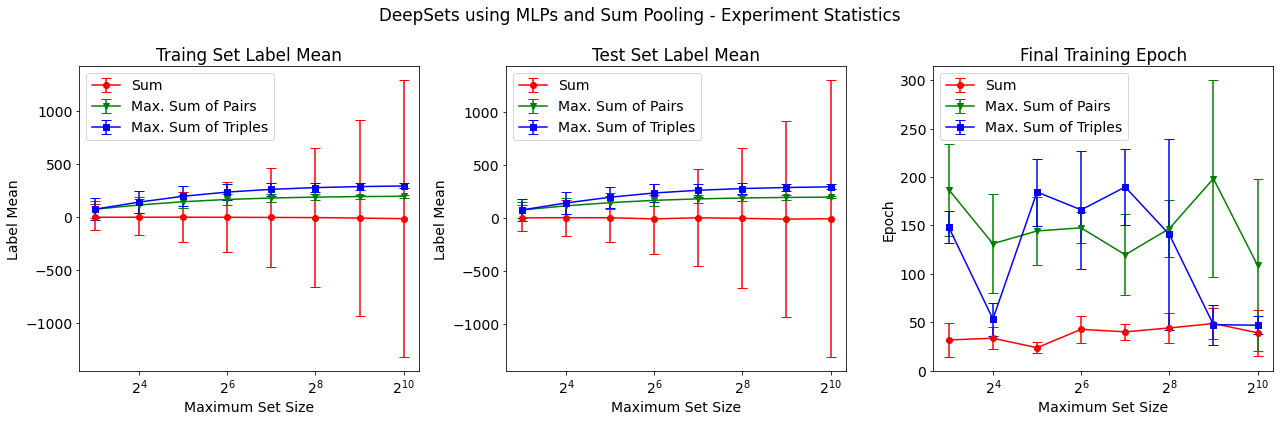

In [109]:
plot_model_results("deepsets_mlp_sum")

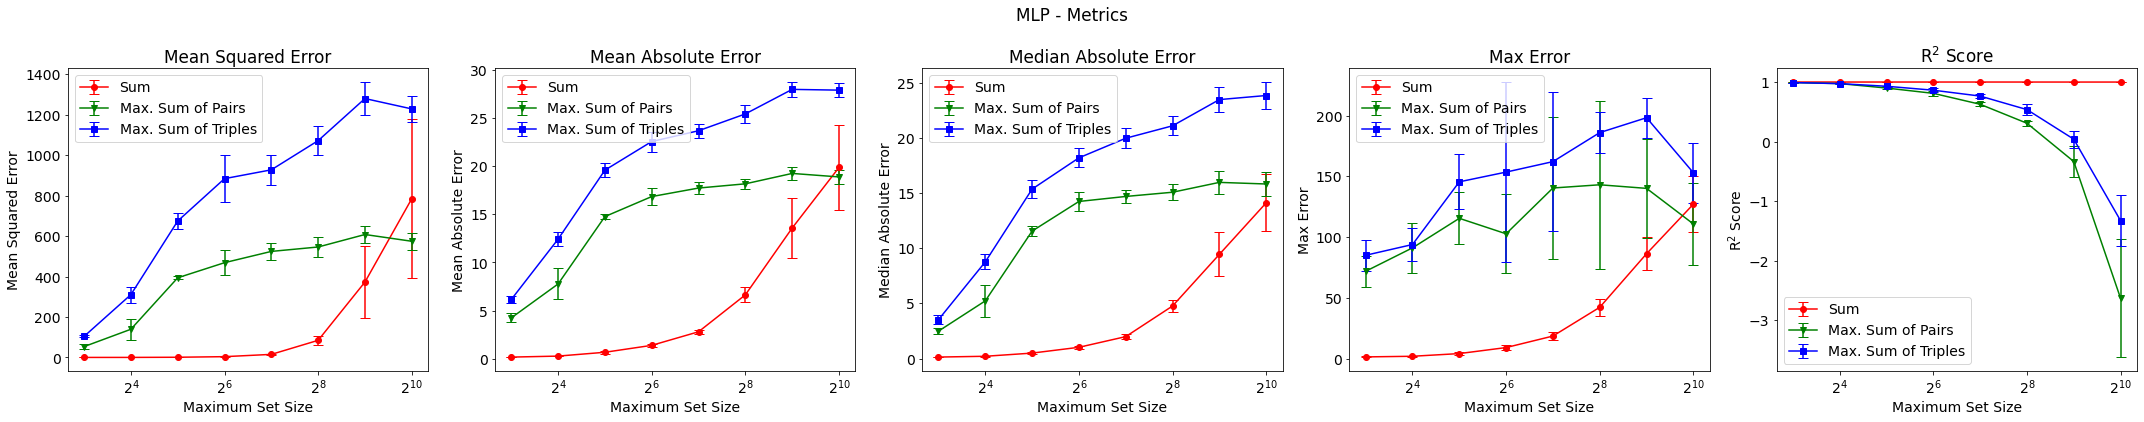

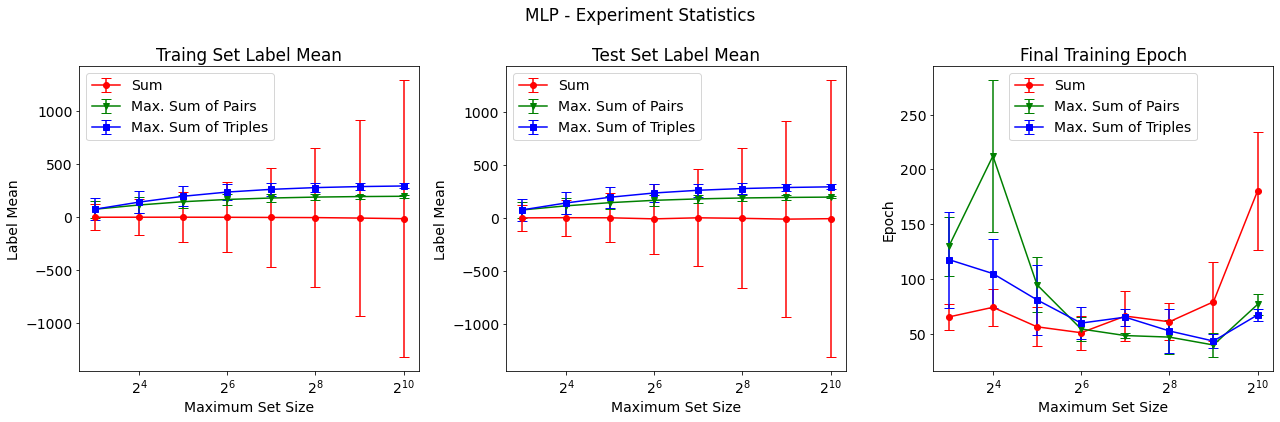

In [108]:
plot_model_results("mlp")

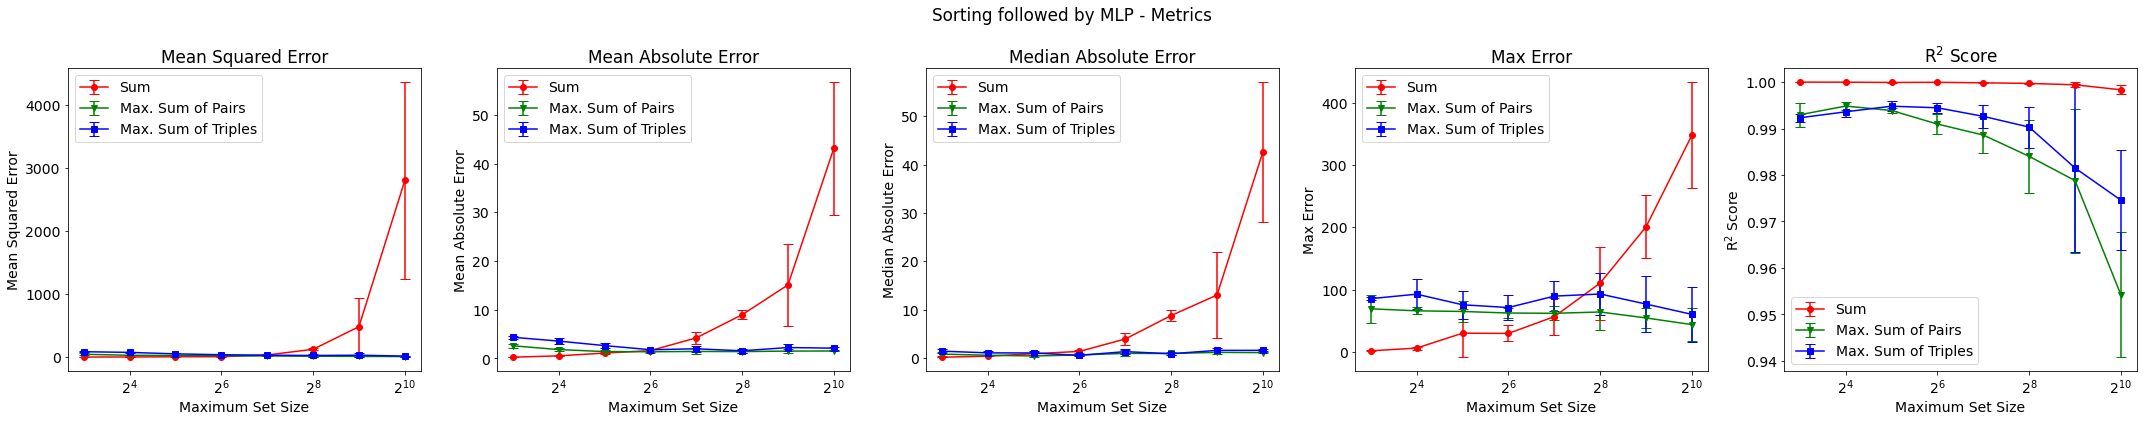

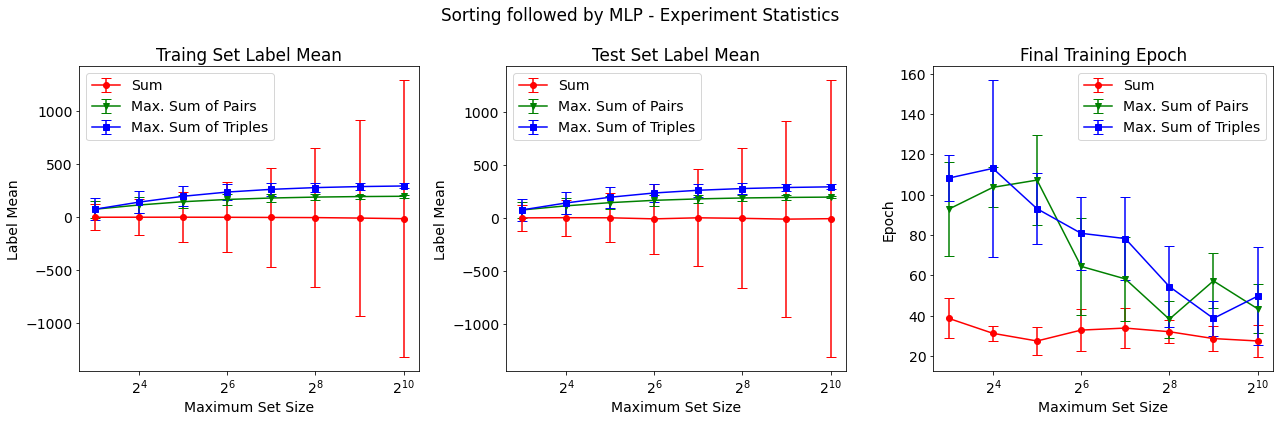

In [104]:
plot_model_results("sorted_mlp")

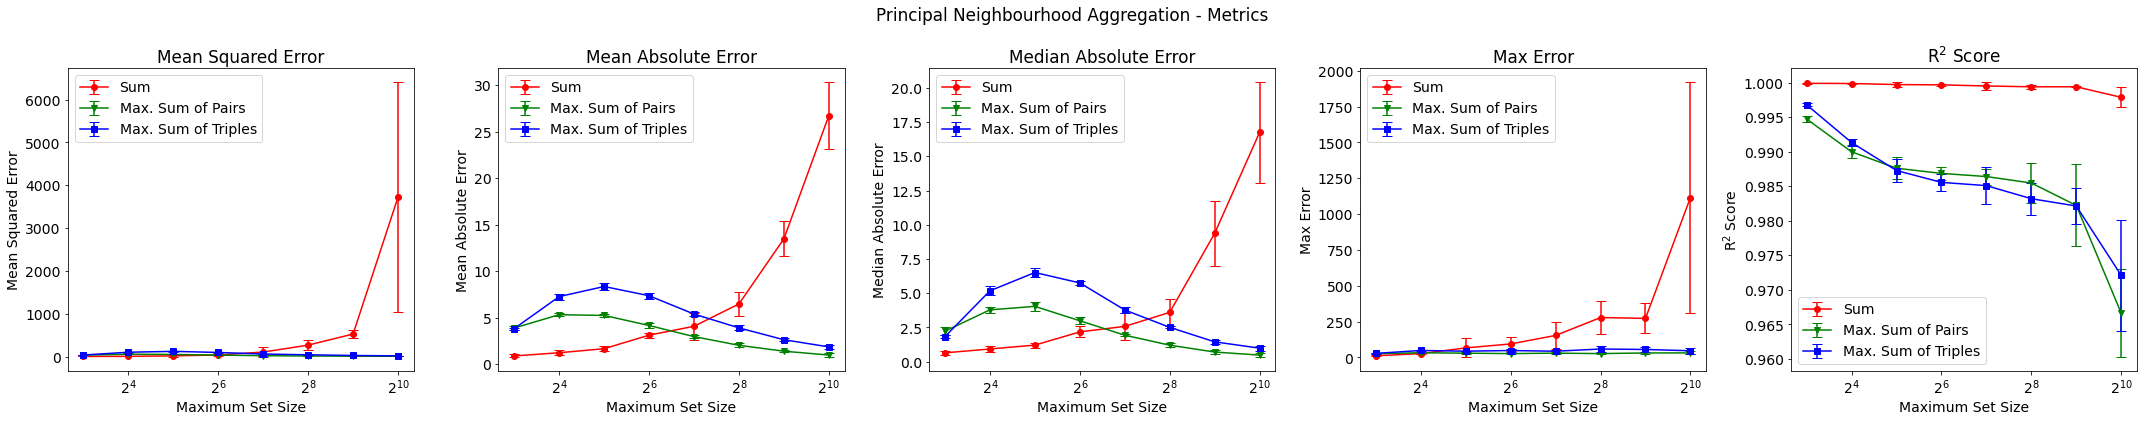

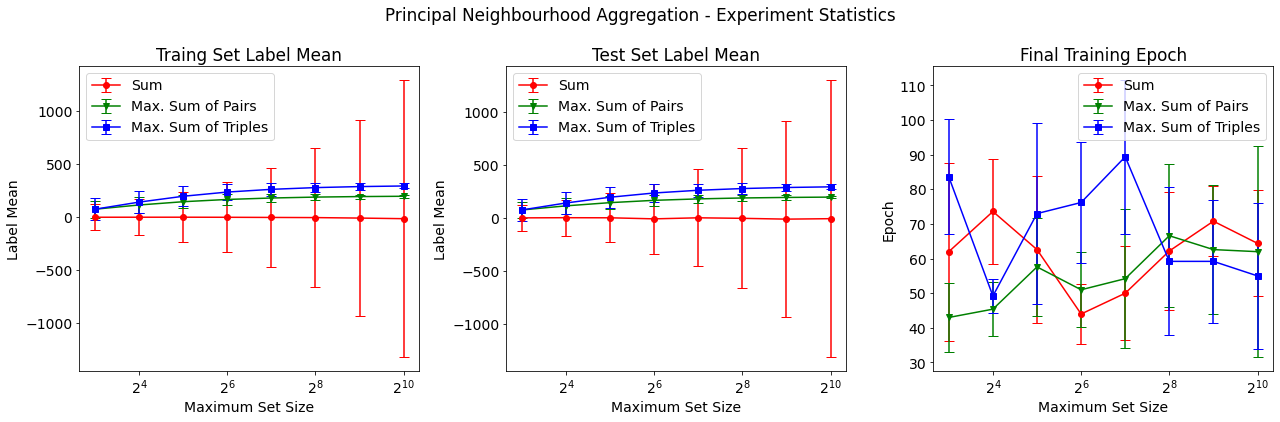

In [102]:
plot_model_results("pna")

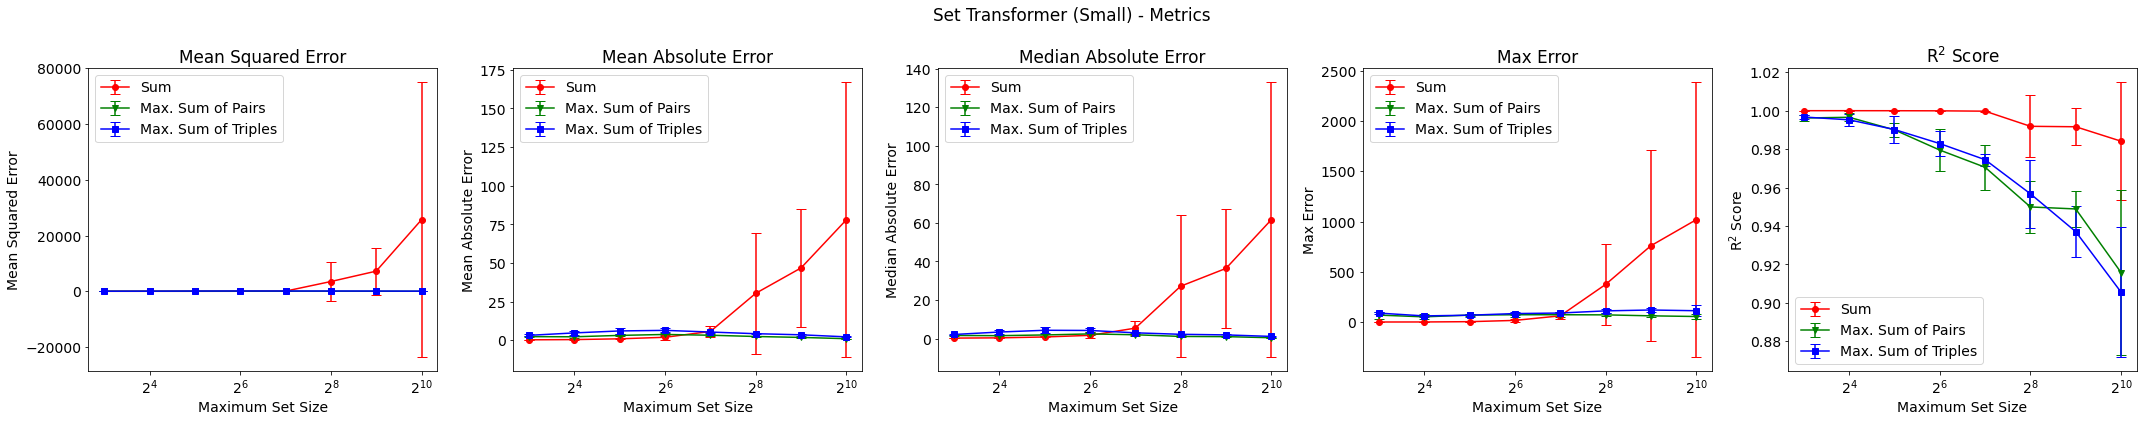

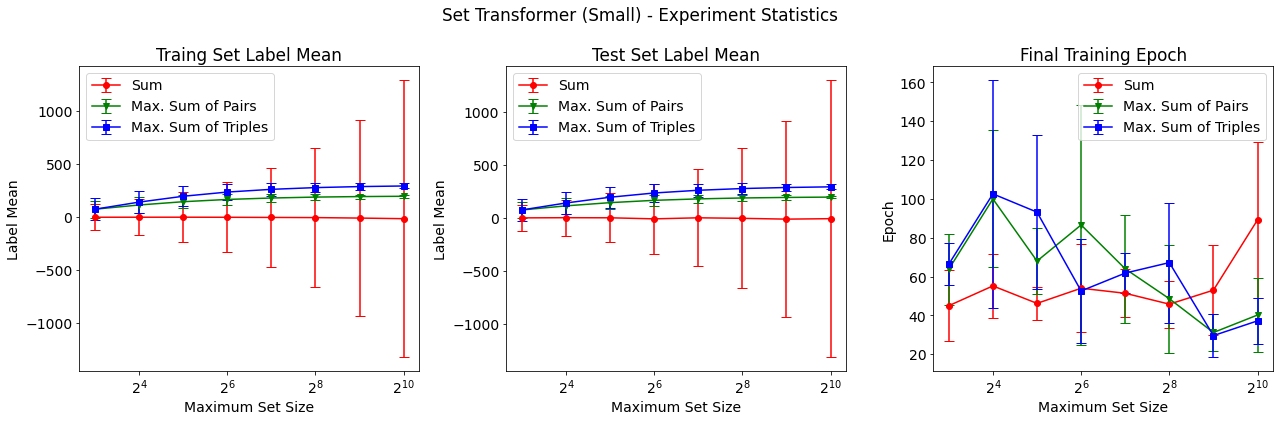

In [116]:
plot_model_results("small_set_transformer")